In [1]:
import anndata as ad
import scanpy as sc

In [2]:
from utils import select_variable_genes, dimension_reduction, plot_visualization_2D

# 1. Load Data

In [3]:
adata = ad.read_h5ad('data/orig.h5ad')
adata_ko = ad.read_h5ad('data/before_knockout.h5ad')
adata_all = ad.concat([adata, adata_ko], label = "batch")
adata_all.uns["workdir"] = "."
adata.uns["workdir"] = "."
adata_ko.uns["workdir"] = "."
ko_labels = ["Irf8--", "Gfi1--",  "Gfi1--Irf8--"]

## 1.1 Wildtype data

500 variable genes are selected


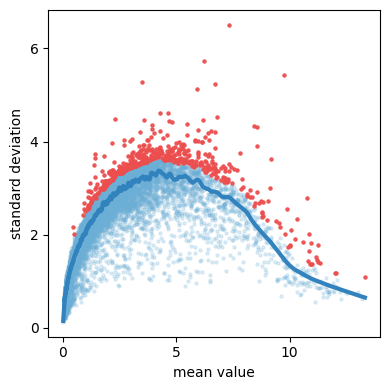

In [4]:
select_variable_genes(adata, loess_frac=0.01, n_genes=500)
adata = adata[:, adata.uns["var_genes"]]

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


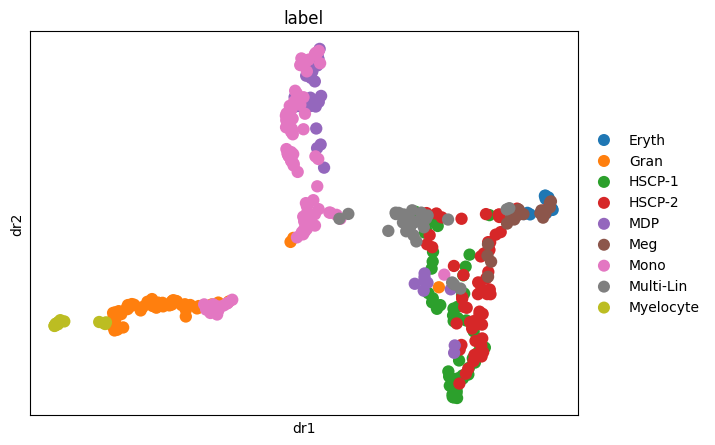

In [5]:
sc.pl.scatter(adata, color='label', basis='dr')

In [6]:
adata.obs["branch_id_id"] = [list(adata.obs["branch_id"].cat.categories).index(x) for x in adata.obs["branch_id"]]

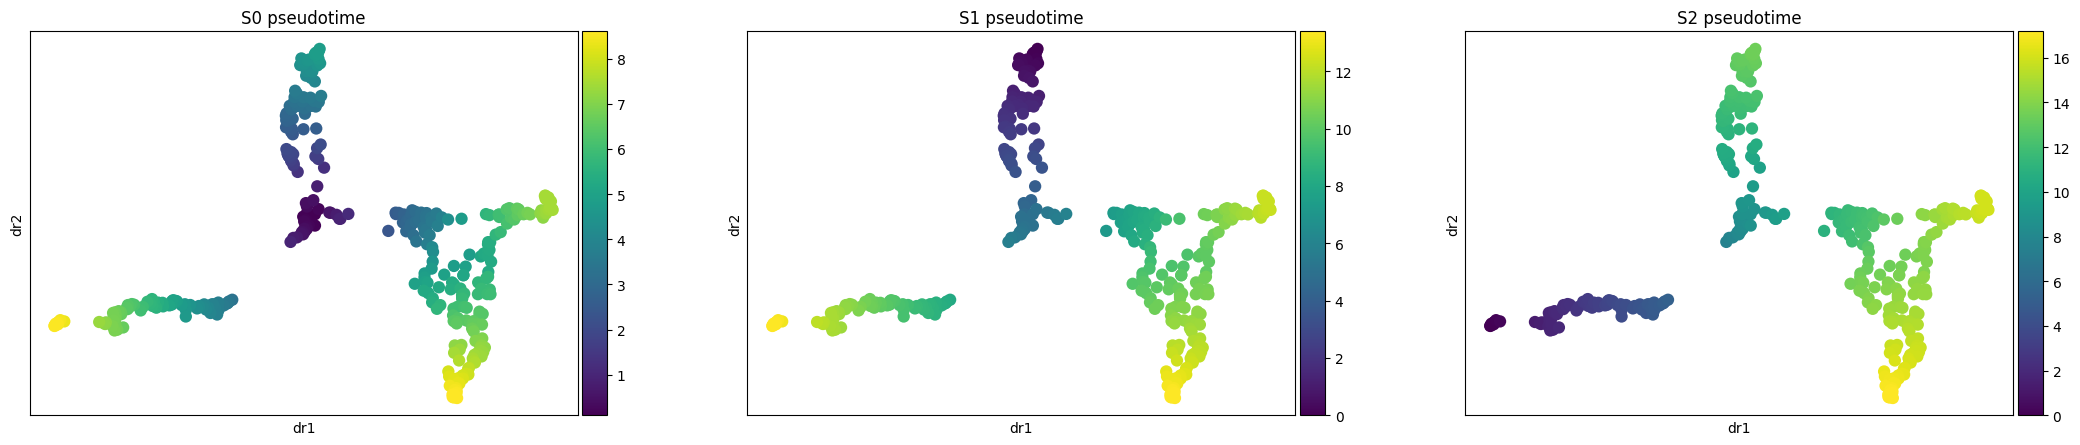

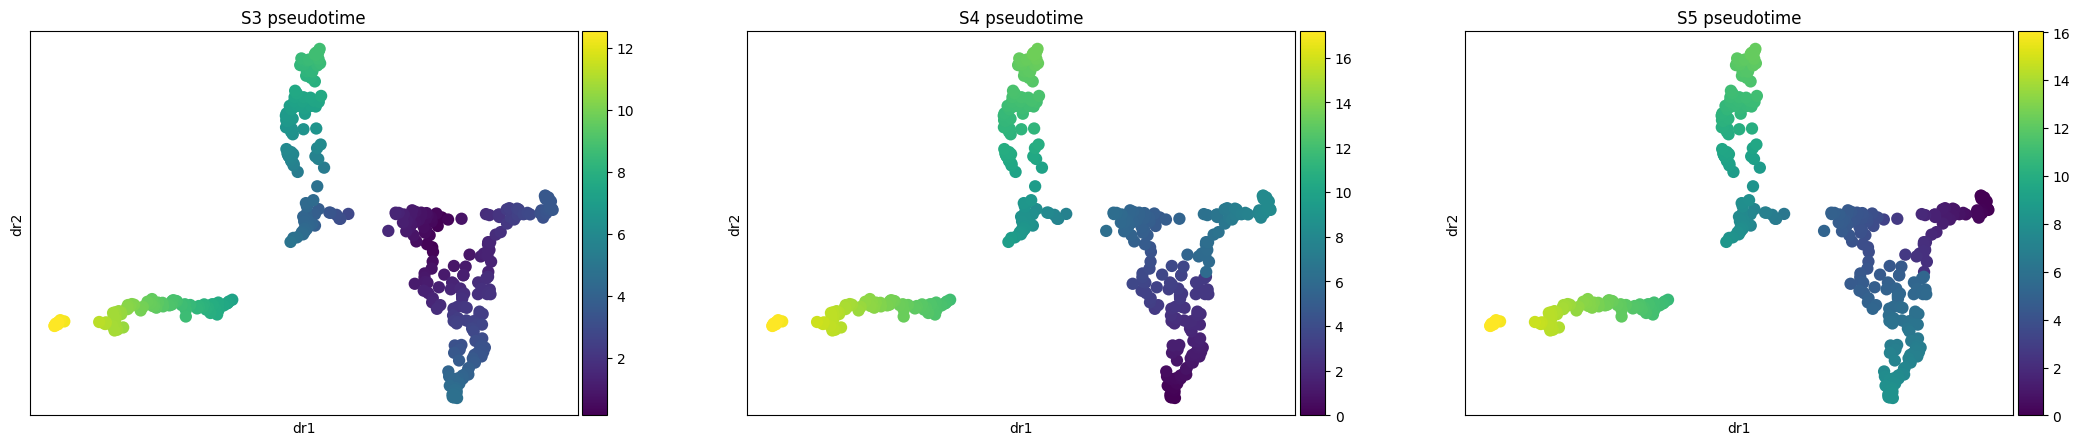

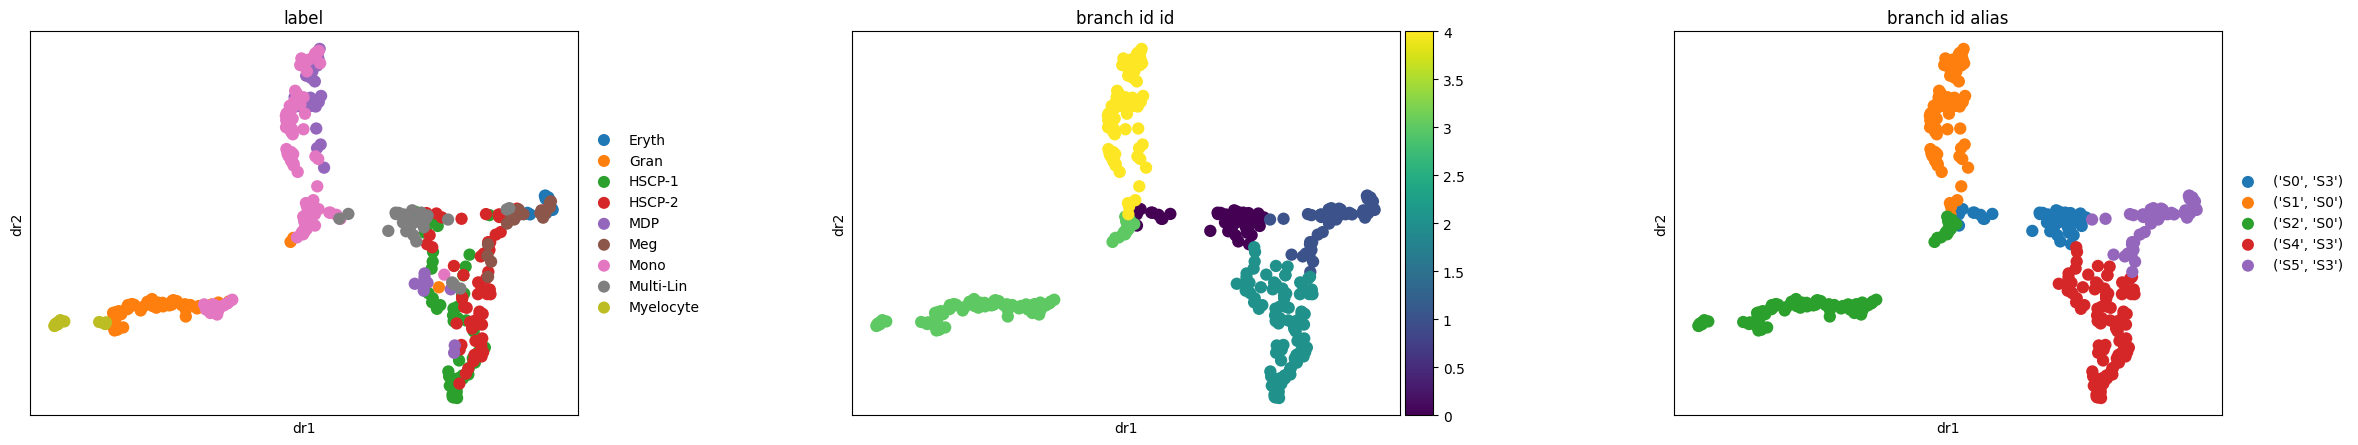

In [7]:
sc.pl.scatter(adata, color=['S0_pseudotime', 'S1_pseudotime', 'S2_pseudotime'], basis='dr')
sc.pl.scatter(adata, color=['S3_pseudotime', 'S4_pseudotime', 'S5_pseudotime'], basis='dr')
sc.pl.scatter(adata, color=['label', 'branch_id_id', 'branch_id_alias'], basis='dr')


From the above figures, we can see that S4_pseudotime is most likely to be the pseudotimevalues used for the dataset if we compare with the results from the paper.

In [8]:
del adata.obsm["var_genes"]

In [9]:
adata.obs["pseudotime"] = adata.obs["S4_pseudotime"]
adata.obs["milestones"] = adata.obs["branch_id_id"]
lineages = {"erythrocytic": [2, 1], "monocytic": [2, 0, 4], "granulocytic": [2, 0, 3]}
adata.uns["lineages"] = lineages

In [10]:
adata

AnnData object with n_obs × n_vars = 382 × 500
    obs: 'label', 'n_counts', 'n_genes', 'pct_genes', 'kmeans', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'branch_id_id', 'pseudotime', 'milestones'
    var: 'n_counts', 'n_cells', 'pct_cells'
    uns: 'workdir', 'var_genes', 'label_colors', 'branch_id_alias_colors', 'lineages'
    obsm: 'X_dr', 'X_mlle', 'X_spring', 'X_stream_S4', 'X_vis', 'X_vis_umap'

In [11]:
adata.uns["var_genes"] = adata.uns["var_genes"].values

In [12]:
adata.write_h5ad('data/processed_wildtype.h5ad')

## 1.2 Knockout data

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


500 variable genes are selected


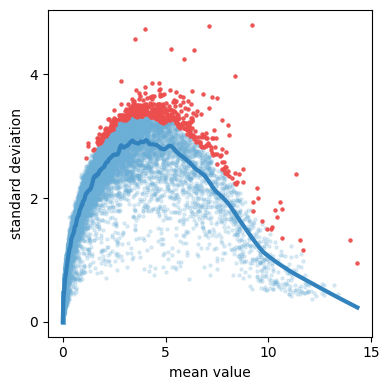

In [13]:
select_variable_genes(adata_ko, loess_frac=0.01, n_genes=500)

In [14]:
dimension_reduction(adata_ko, method='mlle',feature='var_genes',n_components=4,n_neighbors=50,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


In [15]:
dimension_reduction(adata_ko, method="pca", feature="var_genes", n_components=10, n_neighbors=50, n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


In [16]:
for k, v in adata_ko.uns["label_color"].items():
    adata_ko.uns["label_color"][k] = v[0]

In [17]:
adata_ko

AnnData object with n_obs × n_vars = 188 × 23955
    obs: 'label'
    uns: 'label_color', 'workdir', 'var_genes', 'trans_mlle', 'params', 'trans_pca'
    obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca'

In [18]:
# sc.pl.scatter(adata_ko, color=['label'], basis='vis_umap')

In [19]:
# select only highly variable genes
adata_ko = adata_ko[:, adata_ko.uns["var_genes"]]

In [20]:
adata_ko.uns["trans_mlle"] = []

/tmp/ipykernel_42456/43538923.py:1: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata_ko.uns["trans_mlle"] = []


In [21]:
del adata_ko.uns["trans_mlle"]
del adata_ko.uns["trans_pca"]
# del adata_ko.uns["vis_trans_umap"]

In [22]:
adata_ko

AnnData object with n_obs × n_vars = 188 × 500
    obs: 'label'
    uns: 'label_color', 'workdir', 'var_genes', 'params'
    obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca'

In [23]:
irf8 = adata_ko[adata_ko.obs.label == "Irf8--"]
gfi1 = adata_ko[adata_ko.obs.label == "Gfi1--"]
both = adata_ko[adata_ko.obs.label == "Gfi1--Irf8--"]
irf8, gfi1, both

(View of AnnData object with n_obs × n_vars = 62 × 500
     obs: 'label'
     uns: 'label_color', 'workdir', 'var_genes', 'params'
     obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca',
 View of AnnData object with n_obs × n_vars = 79 × 500
     obs: 'label'
     uns: 'label_color', 'workdir', 'var_genes', 'params'
     obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca',
 View of AnnData object with n_obs × n_vars = 47 × 500
     obs: 'label'
     uns: 'label_color', 'workdir', 'var_genes', 'params'
     obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca')

In [24]:
mapped_irf8 = ad.read_h5ad("data/irf8_mapped.h5ad")
mapped_gfi1 = ad.read_h5ad("data/gfil_mapped.h5ad")
mapped_both = ad.read_h5ad("data/both_mapped.h5ad")
mapped_irf8, mapped_gfi1, mapped_both

(AnnData object with n_obs × n_vars = 62 × 23955
     obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'batch'
     uns: 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap', 'workdir'
     obsm: 'X_dr', 'X_vis_umap', 'var_genes',
 AnnData object with n_obs × n_vars = 79 × 23955
     obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'batch'
     uns: 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap', 'workdir'
     obsm: 'X_dr', 'X_vis_umap', 'var_genes',
 AnnData object with n_obs × n_vars = 47 × 23955
     obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S4_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'ba

In [25]:
# presume that the mapped pseudotime is the real pseudotime for the KO samples
irf8.obs["pseudotime"] = mapped_irf8.obs["S4_pseudotime"].values
gfi1.obs["pseudotime"] = mapped_gfi1.obs["S4_pseudotime"].values
both.obs["pseudotime"] = mapped_both.obs["S4_pseudotime"].values
irf8, gfi1, both

/tmp/ipykernel_42456/3458327699.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  irf8.obs["pseudotime"] = mapped_irf8.obs["S4_pseudotime"].values
/tmp/ipykernel_42456/3458327699.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  gfi1.obs["pseudotime"] = mapped_gfi1.obs["S4_pseudotime"].values
/tmp/ipykernel_42456/3458327699.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  both.obs["pseudotime"] = mapped_both.obs["S4_pseudotime"].values


(AnnData object with n_obs × n_vars = 62 × 500
     obs: 'label', 'pseudotime'
     uns: 'label_color', 'workdir', 'var_genes', 'params'
     obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca',
 AnnData object with n_obs × n_vars = 79 × 500
     obs: 'label', 'pseudotime'
     uns: 'label_color', 'workdir', 'var_genes', 'params'
     obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca',
 AnnData object with n_obs × n_vars = 47 × 500
     obs: 'label', 'pseudotime'
     uns: 'label_color', 'workdir', 'var_genes', 'params'
     obsm: 'var_genes', 'X_mlle', 'X_dr', 'X_pca')

In [26]:
irf8.uns["var_genes"] = irf8.uns["var_genes"].values
gfi1.uns["var_genes"] = gfi1.uns["var_genes"].values
both.uns["var_genes"] = both.uns["var_genes"].values

In [27]:
irf8.write_h5ad("data/processed_irf8.h5ad")
gfi1.write_h5ad("data/processed_gfi1.h5ad")
both.write_h5ad("data/processed_both.h5ad")